Nama: Muhammad Zukri Al Walidani
Batch: 007

Berikut merupakan data persebaran uber dan Lyft

Import Pustaka

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split # to split the data into two parts
import warnings
warnings.filterwarnings('ignore')

Data Loading

In [5]:
df=pd.read_csv('rideshare_kaggle.csv')

Data Cleaning


In [10]:
df['price'].fillna((df['price'].mean()), inplace=True) #mengubah nan menjadi mean

Eksplorasi data sederhana

In [40]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [7]:
df.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [8]:
df.shape

(693071, 57)

In [9]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [11]:
df.info(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        693071 non-null  float64
 13 

In [12]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

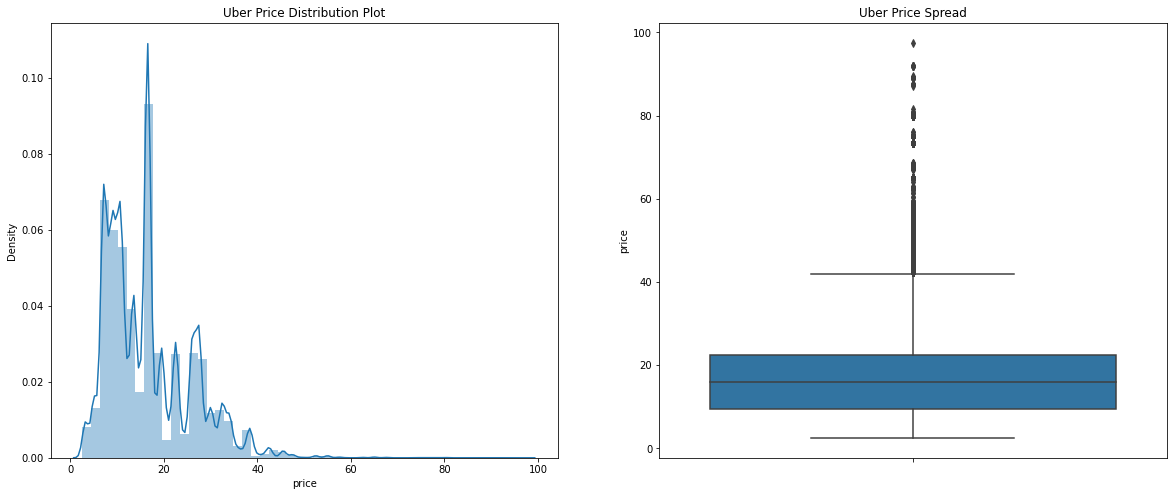

In [13]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Uber Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Uber Price Spread')
sns.boxplot(y=df.price)

plt.show()

In [14]:
print(df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    693071.000000
mean         16.545125
std           8.946069
min           2.500000
25%           9.500000
50%          16.000000
75%          22.500000
85%          27.000000
90%          29.000000
100%         97.500000
max          97.500000
Name: price, dtype: float64


data kategori

datetime, timezone, source ,destination, cab_type, product_id                   

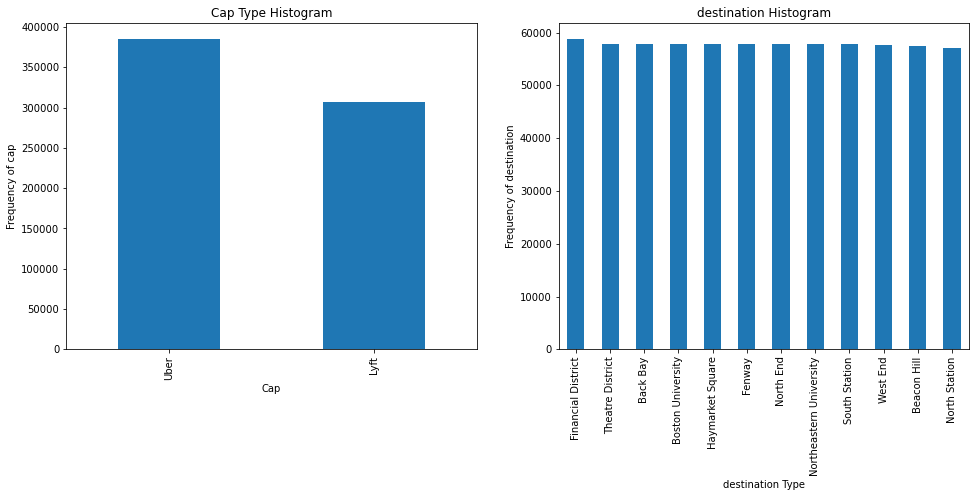

In [15]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.cab_type.value_counts().plot(kind='bar')
plt.title('Cap Type Histogram')
plt1.set(xlabel = 'Cap', ylabel='Frequency of cap')

plt.subplot(1,3,2)
plt1 = df.destination.value_counts().plot(kind='bar')
plt.title('destination Histogram')
plt1.set(xlabel = 'destination Type', ylabel='Frequency of destination')
plt.show()




inference:
1. Uber lebih diminati dari Lyft
2. destinasi cenderung merata

[Text(0.5, 0, 'Icon Type'), Text(0, 0.5, 'Frequency of Icon')]

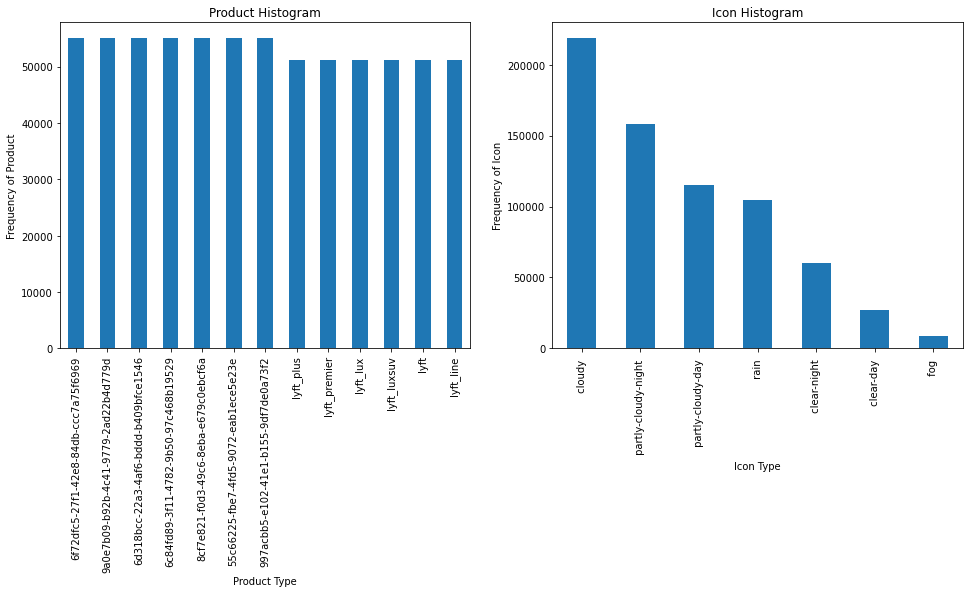

In [16]:
plt.figure(figsize=(25, 6))
plt.subplot(1,3,1)
plt1 = df.product_id.value_counts().plot(kind='bar')
plt.title('Product Histogram')
plt1.set(xlabel = 'Product Type', ylabel='Frequency of Product')

plt.subplot(1,3,2)
plt1 = df.icon.value_counts().plot(kind='bar')
plt.title('Icon Histogram')
plt1.set(xlabel = 'Icon Type', ylabel='Frequency of Icon')



inference:
1. Product type uber lebih unggul secara merata
2. Penumpang banyak saat berawan

In [17]:
catCols = [col for col in df.columns if df[col].dtype=="O"]
catCols 

['id',
 'datetime',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon']

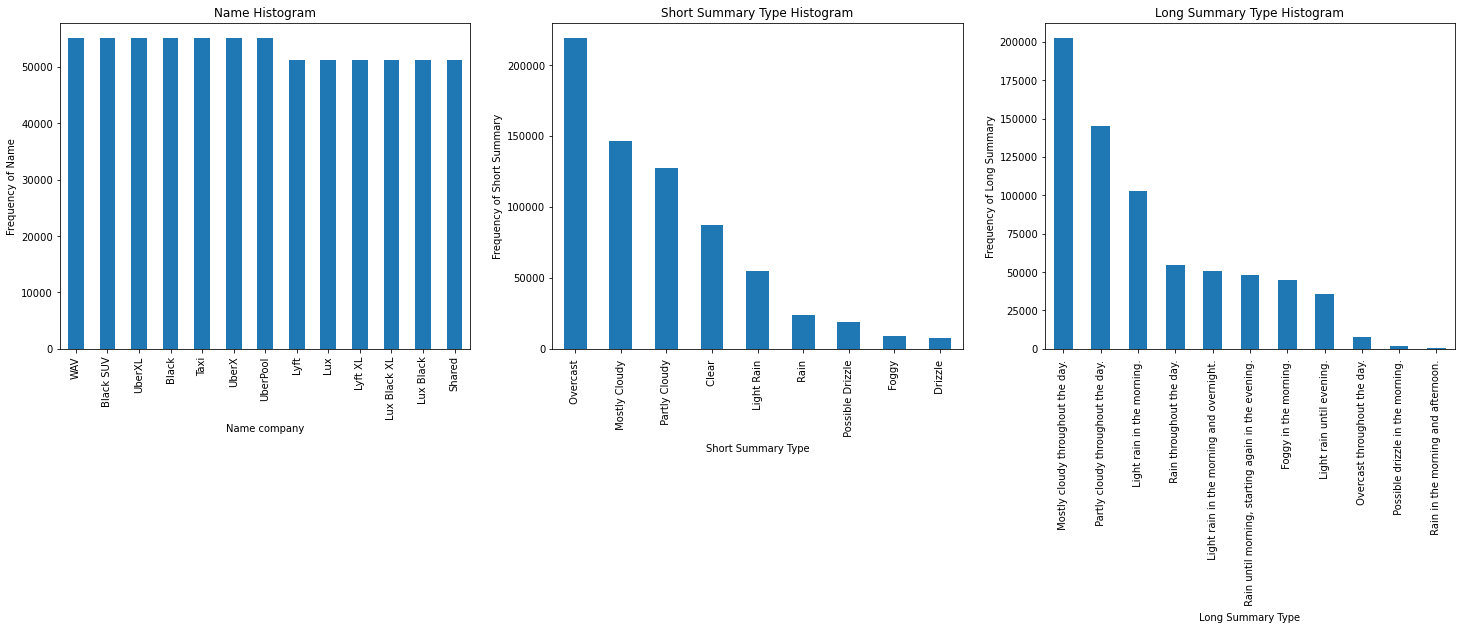

In [18]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.name.value_counts().plot(kind='bar')
plt.title('Name Histogram')
plt1.set(xlabel = 'Name company', ylabel='Frequency of Name')

plt.subplot(1,3,2)
plt1 = df.short_summary.value_counts().plot(kind='bar')
plt.title('Short Summary Type Histogram')
plt1.set(xlabel = 'Short Summary Type', ylabel='Frequency of Short Summary')

plt.subplot(1,3,3)
plt1 = df.long_summary.value_counts().plot(kind='bar')
plt.title('Long Summary Type Histogram')
plt1.set(xlabel = 'Long Summary Type', ylabel='Frequency of Long Summary')

plt.show()

inference:
1. Uber lebih diminati dari Lyft
2. pada short summary overcast yang paling unggul
3. pada long summary mosltly cloudy throught the day yang paling unggul

In [19]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [20]:

cols = df.select_dtypes([np.number]).columns
cols


Index(['timestamp', 'hour', 'day', 'month', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime',
       'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime',
       'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
      dtype='object')

Mengimplementasikan Linear Regression Dengan Scikit-Learn

In [21]:
X = df[[ 'distance', 'windSpeed', 'longitude','temperatureHigh', 'temperatureLow','precipIntensity','pressure']]
y = df['price']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [25]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [26]:
print(lin_reg.intercept_)

16.56181785166635


In [27]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
distance,2.949407
windSpeed,0.017972
longitude,-0.008156
temperatureHigh,0.014850
temperatureLow,0.002806
precipIntensity,0.000756
pressure,0.014107


In [28]:
pred = lin_reg.predict(X_test)

Mencoba model yang telah dibuat dengan data baru yang disediakan

In [33]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

AttributeError: 'DataFrame' object has no attribute 'hvplot'

In [34]:
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

AttributeError: 'DataFrame' object has no attribute 'hvplot'

In [37]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [38]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 6.736962422053222
MSE: 71.13120717547537
RMSE: 8.433931892982974
R2 Square 0.10961576398540618
__________________________________
Train set evaluation:
_____________________________________
MAE: 6.744631705993698
MSE: 71.39322926383329
RMSE: 8.449451417922544
R2 Square 0.10861802946767252
__________________________________


Model Analysis:
R2 pada data Test 0.108 dan R2 Square data train 109 tidak jauh berbeda

Overall Analysis
1. Uber lebih diminati dari Lyft
2. destinasi cenderung merata
3. Product type uber lebih unggul secara merata
4. Penumpang banyak saat berawan
5. Peningkatan jarak sebanyak 1 akan meningkatkan price sebesar 2.9